In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [4]:
import pickle
import gensim
data = pickle.load(open("/content/drive/My Drive/bird/image_vectors.p", "rb"))
word_vector = pickle.load(open("/content/drive/My Drive/bird/word_vector_min_bird.p", "rb"))
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/word2vec/GoogleNews-vectors-negative300.bin', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Using TensorFlow backend.


11840
11840
Crested_Auklet_0001_794941.jpg
Crested_Auklet_0001_794941.jpg
Crested_Auklet_0029_1824.jpg
Crested_Auklet_0074_794949.jpg
Crested_Auklet_0045_794940.jpg
Crested_Auklet_0077_785257.jpg
Crested_Auklet_0018_1817.jpg
Crested_Auklet_0041_794910.jpg
Crested_Auklet_0066_785251.jpg


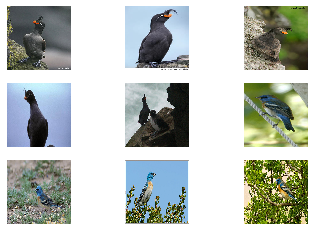

In [5]:

import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import expand_dims
from random import randint, choice

def random_flip(image):
  image = tf.image.flip_left_right(image)
  return image.numpy()

def random_jitter(image):

  image = expand_dims(image, 0) #add additional dimension necessary for zooming
  image = image_augmentation_generator.flow(image, batch_size=1)
  result = image[0].reshape(image[0].shape[1:]) #remove additional dimension (1, 64, 64, 3) to (64, 64, 3)
  return result

image_augmentation_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.8, 1.0]) # random zoom proves to be helpful in capturing more details https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

n = 227
image_embeddings = []
captions = []
labels = []
for i, k in enumerate(data.keys()):
  image_embeddings.append(data[k])
  captions.append(word_vector[k])
  labels.append(k)
  if i % n == 0:
   image_embeddings.append(random_jitter(data[k]))
   captions.append(word_vector[k])
   labels.append(k)

print(len(captions))
print(len(image_embeddings))

pyplot.axis('off')
slcie = image_embeddings[40:50]
for i in range(9):
  pyplot.subplot(3, 3, i+1)
  pyplot.imshow(array_to_img(slcie[i]))
  print(labels[i])
  pyplot.axis('off')

pyplot.show()

In [0]:
import numpy as np

def get_random_word_vectors_from_dataset(n_samples):
  ix = np.random.randint(0, len(captions), n_samples)
  return np.asarray(captions)[ix]


In [0]:

def generate_random_vectors(n_samples):  
  vectorized_random_captions = []

  for n in range(n_samples):
    rnd = randint(8, 25)
    result_array = np.empty((0, 300))
    for i in range(rnd):
      result_array = np.append(result_array, [model[choice(model.index2entity)]], axis=0)
    vectorized_random_captions.append(np.mean(result_array, axis=0).astype('float32'))

  return np.array(vectorized_random_captions)


In [0]:
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
from keras.layers.advanced_activations import PReLU
from keras.utils import plot_model

# Discriminator model
def define_discriminator():
    word_vector_dim = 300
    dropout_prob = 0.4

    in_label = layers.Input(shape=(300,))

    n_nodes = 3 * 64 * 64
    li = layers.Dense(n_nodes)(in_label)
    li = layers.Reshape((64, 64, 3))(li)

    dis_input = layers.Input(shape=(64, 64, 3))

    merge = layers.Concatenate()([dis_input, li])

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(merge)
    discriminator = layers.LeakyReLU(0.2)(discriminator)
    discriminator = layers.GaussianNoise(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU()(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Conv2D(filters=512, kernel_size=(3, 3), padding="same")(discriminator)
    discriminator = layers.BatchNormalization(momentum=0.5)(discriminator)
    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Flatten()(discriminator)

    discriminator = layers.Dense(1024)(discriminator)

    discriminator = layers.LeakyReLU(0.2)(discriminator)

    discriminator = layers.Dense(1)(discriminator)

    discriminator_model = Model(inputs=[dis_input, in_label], outputs=discriminator)

    discriminator_model.summary()

    return discriminator_model


def resnet_block(model, kernel_size, filters, strides):
    gen = model
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)
    model = layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen, model])
    return model


# Generator model
def define_generator():
    kernel_init = tf.random_normal_initializer(stddev=0.02)
    batch_init = tf.random_normal_initializer(1., 0.02)

    random_input = layers.Input(shape=(100,))
    text_input1 = layers.Input(shape=(300,))
    text_layer1 = layers.Dense(8192)(text_input1)
    text_layer1 = layers.Reshape((8, 8, 128))(text_layer1)

    n_nodes = 128 * 8 * 8
    gen_input_dense = layers.Dense(n_nodes)(random_input)
    generator = layers.Reshape((8, 8, 128))(gen_input_dense)

    merge = layers.Concatenate()([generator, text_layer1])

    model = layers.Conv2D(filters=64, kernel_size=9, strides=1, padding="same")(merge)
    model = tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1, 2])(model)

    gen_model = model

    for _ in range(4):
      model = resnet_block(model, 3, 64, 1)

    model = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(model)
    model = layers.BatchNormalization(momentum=0.5)(model)
    model = layers.Add()([gen_model, model])

    model = layers.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer=kernel_init)(model)
    model = layers.LeakyReLU(0.2)(model)

    model = layers.Conv2D(3, (3, 3), padding='same', activation='tanh')(model)

    generator_model = Model(inputs=[random_input, text_input1], outputs=model)

    generator_model.summary()

    return generator_model

In [64]:
from IPython.display import clear_output


def generate_latent_points(latent_dim, n_samples):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions = get_random_word_vectors_from_dataset(n_samples)
    return [x_input, text_captions]

# Randomly flip some labels. Credits to https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/
def noisy_labels(y, p_flip):
    n_select = int(p_flip * int(y.shape[0]))
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)

    op_list = []
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1.0, y[i]))
        else:
            op_list.append(y[i])

    outputs = tf.stack(op_list)
    return outputs

def load_data():
    return asarray(image_embeddings), asarray(captions).astype('float32')

def smooth_positive_labels(y):
	return y - 0.3 + (np.random.random(y.shape) * 0.5)
 
def smooth_negative_labels(y):
	return y + np.random.random(y.shape) * 0.3

def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[7, 7])

  for i in range(predictions.shape[0]):
      pyplot.subplot(5, 5, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  pyplot.show()


def discriminator_loss(r_real_output_real_text, f_fake_output_real_text_1, f_real_output_fake_text):
   alpha = 0.5
   real_output_noise = smooth_positive_labels(noisy_labels(tf.ones_like(r_real_output_real_text), 0.10))
   fake_output_real_text_noise_1 = smooth_negative_labels(tf.zeros_like(f_fake_output_real_text_1))
   real_output_fake_text_noise = smooth_negative_labels(tf.zeros_like(f_real_output_fake_text))

   real_loss = tf.reduce_mean(binary_cross_entropy(real_output_noise, r_real_output_real_text))
   fake_loss_ms_1 = tf.reduce_mean(binary_cross_entropy(fake_output_real_text_noise_1, f_fake_output_real_text_1))
   fake_loss_2 = tf.reduce_mean(binary_cross_entropy(real_output_fake_text_noise, f_real_output_fake_text))

   total_loss = real_loss + alpha * fake_loss_2 + (1-alpha) * fake_loss_ms_1 
   return total_loss

def generator_loss(f_fake_output_real_text):
   return tf.reduce_mean(binary_cross_entropy(tf.ones_like(f_fake_output_real_text), f_fake_output_real_text))

@tf.function
def train_step(images, epoch):

  #define half_batch
  latent_dim = 100
  n_batch = 64

  noise_1 = tf.random.normal([32, latent_dim])
  noise_2 = tf.random.normal([32, latent_dim])
  real_captions = images[1]
  real_images = images[0]

  random_captions = generate_random_vectors(n_batch)
  random_captions_1, random_captions_2  = tf.split(random_captions, 2, 0)
  real_captions_1, real_captions_2  = tf.split(real_captions, 2 ,0)
  real_images_1, real_images_2 = tf.split(real_images, 2, 0)

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    
    noise = tf.concat([noise_1, noise_2], 0)

    generated_images = generator([noise, real_captions], training=True)

    fake_1, fake_2 = tf.split(generated_images, 2, 0)

    f_fake_output_real_text_1 = discriminator([fake_1, real_captions_1], training=True)
    f_fake_output_real_text_2 = discriminator([fake_2, real_captions_2], training=True)

    r_real_output_real_text_1 = discriminator([real_images_1, real_captions_1], training=True)
    r_real_output_real_text_2 = discriminator([real_images_2, real_captions_2], training=True)

    f_real_output_fake_text_1 = discriminator([real_images_1, random_captions_1], training=True)
    f_real_output_fake_text_2 = discriminator([real_images_2, random_captions_2], training=True)

    #### Calculating losses ####

    gen_loss = generator_loss(f_fake_output_real_text_1) + generator_loss(f_fake_output_real_text_2) 
    # mode seeking loss
    lz = tf.math.reduce_mean(tf.math.abs(fake_2-fake_1)) / tf.math.reduce_mean(tf.math.abs(noise_2-noise_1))
    eps = 1 * 1e-5
    loss_lz = 1 / (eps+lz) * ms_loss_weight
    total_gen_loss = gen_loss + loss_lz

    tf.print('G_loss', [total_gen_loss])

    disc_loss_1 = discriminator_loss(r_real_output_real_text_1, f_fake_output_real_text_1, f_real_output_fake_text_1)
    disc_loss_2 = discriminator_loss(r_real_output_real_text_2, f_fake_output_real_text_2, f_real_output_fake_text_2)
    
    total_disc_loss = disc_loss_1 + disc_loss_2

    tf.print('D_loss', [total_disc_loss])

    #### Done calculating losses ####

  gradients_of_discriminator = disc_tape.gradient(total_disc_loss, discriminator.trainable_variables)  

  gradients_of_generator = gen_tape.gradient(total_gen_loss, generator.trainable_variables)    

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



def train(dataset, epochs = 2000):

  checkpoint_dir = '/content/drive/My Drive/checkpoints_2'
  checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
  checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                  generator=generator,
                                  discriminator=discriminator)
  
  ckpt_manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
  if ckpt_manager.latest_checkpoint:
    checkpoint.restore(ckpt_manager.latest_checkpoint)  #ckpt_manager.checkpoints[3]
    print ('Latest checkpoint restored!!')

  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch, epoch) 

    if (epoch +1) % 10 == 0:
      [z_input, labels_input] = generate_latent_points(100, 25)
      generate_and_save_images(generator,
                            epoch + 1,
                             [z_input, labels_input])

    if (epoch + 1) % 40 == 0:
      ckpt_save_path = ckpt_manager.save()
      print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,ckpt_save_path))

    if (epoch +1) % 60 == 0:
    
      clear_output(wait=True)
      generator.save('/content/drive/My Drive/46stage_new_gan_animal_model_%03d.h5' % (epoch + 1))     

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

ms_loss_weight = 1.0

binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.000035, beta_1 = 0.5)

discriminator = define_discriminator()
generator = define_generator()

images, lbs = load_data()
BUFFER_SIZE = images.shape[0]
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((images,lbs)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

train(train_dataset)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 12288)        3698688     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 64, 64, 3)    0           dense[0][0]                      
______________________________________________________________________________________________

NotFoundError: ignored

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[ 3730  9380  1920  1605  5776  7569  9277  3918 11646]
0 Least_Auklet_0060_795095.jpg
1 Red_Breasted_Merganser_0004_79232.jpg
2 Bronzed_Cowbird_0017_24019.jpg
3 Red_Legged_Kittiwake_0068_795430.jpg
4 White_Breasted_Kingfisher_0011_73267.jpg
5 Loggerhead_Shrike_0059_106086.jpg
6 Vermilion_Flycatcher_0053_42184.jpg
7 Black_Billed_Cuckoo_0053_795321.jpg
8 Heermann_Gull_0046_45888.jpg
(9, 64, 64, 3)


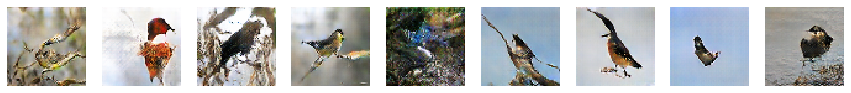

[10280  5143   892  8579  3487  4298 10933 10671  4854]
0 Mourning_Warbler_0066_166491.jpg
1 Cedar_Waxwing_0015_178818.jpg
2 Bobolink_0110_9496.jpg
3 Gray_Kingbird_0071_70100.jpg
4 Sayornis_0003_98618.jpg
5 Pied_Billed_Grebe_0040_35981.jpg
6 Worm_Eating_Warbler_0053_176079.jpg
7 Le_Conte_Sparrow_0043_795213.jpg
8 Seaside_Sparrow_0033_796506.jpg
(9, 64, 64, 3)


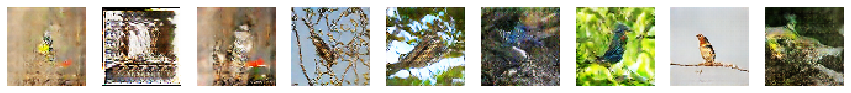

[10507 11794  5575  9318 11646  4119   420  1545  2106]
0 White_Crowned_Sparrow_0068_126156.jpg
1 Blue_Grosbeak_0036_37048.jpg
2 American_Three_Toed_Woodpecker_0027_796147.jpg
3 Vermilion_Flycatcher_0047_42488.jpg
4 Heermann_Gull_0046_45888.jpg
5 Mockingbird_0094_80232.jpg
6 Anna_Hummingbird_0122_56622.jpg
7 Yellow_Bellied_Flycatcher_0038_795477.jpg
8 White_Necked_Raven_0014_102687.jpg
(9, 64, 64, 3)


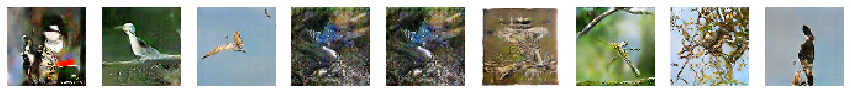

[ 8308  2013  8068  6947  4048  3183 10614  9897 10271]
0 Barn_Swallow_0015_132757.jpg
1 Black_Throated_Sparrow_0050_107033.jpg
2 Northern_Waterthrush_0103_177162.jpg
3 Nighthawk_0058_83270.jpg
4 Pine_Grosbeak_0032_38473.jpg
5 Sage_Thrasher_0098_796448.jpg
6 Le_Conte_Sparrow_0097_795183.jpg
7 Baltimore_Oriole_0127_87560.jpg
8 Mourning_Warbler_0054_795387.jpg
(9, 64, 64, 3)


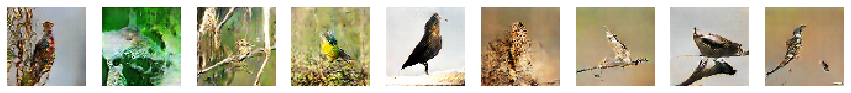

[10322  7238  1106  8201  1586  9475  9668  5095  2240]
0 Nashville_Warbler_0027_167224.jpg
1 Green_Tailed_Towhee_0025_797401.jpg
2 Kentucky_Warbler_0030_795885.jpg
3 Louisiana_Waterthrush_0080_177379.jpg
4 Yellow_Bellied_Flycatcher_0028_42639.jpg
5 Black_Footed_Albatross_0047_796064.jpg
6 Tennessee_Warbler_0095_174903.jpg
7 Blue_Headed_Vireo_0032_156239.jpg
8 Red_Eyed_Vireo_0053_156885.jpg
(9, 64, 64, 3)


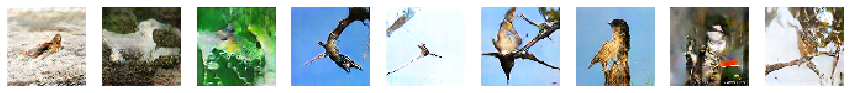

[ 5326  8542 10735 10163  9876  8865  1854  7432  6664]
0 House_Sparrow_0059_111164.jpg
1 Gray_Catbird_0013_20562.jpg
2 Sooty_Albatross_0064_796343.jpg
3 Bewick_Wren_0039_184989.jpg
4 Baltimore_Oriole_0039_88027.jpg
5 Florida_Jay_0062_64996.jpg
6 Purple_Finch_0036_27641.jpg
7 Elegant_Tern_0035_150744.jpg
8 Philadelphia_Vireo_0041_156642.jpg
(9, 64, 64, 3)


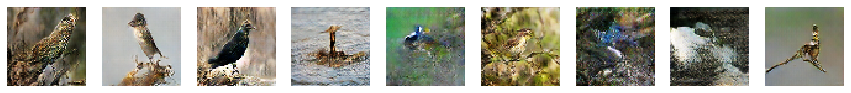

[ 436    0  835  919 1995 4897 5536 6322  687]
0 Anna_Hummingbird_0118_55773.jpg
1 Crested_Auklet_0001_794941.jpg
2 Ovenbird_0126_92602.jpg
3 Bobolink_0081_9439.jpg
4 Black_Throated_Sparrow_0097_106935.jpg
5 Ivory_Gull_0010_49169.jpg
6 American_Three_Toed_Woodpecker_0024_179876.jpg
7 Cape_Glossy_Starling_0077_129378.jpg
8 Scissor_Tailed_Flycatcher_0005_41727.jpg
(9, 64, 64, 3)


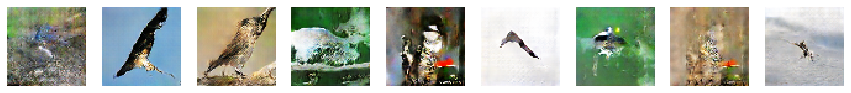

[10052 11361  5298  7913  2189  5477  9485 11439  6275]
0 Acadian_Flycatcher_0006_795595.jpg
1 Parakeet_Auklet_0001_795972.jpg
2 House_Sparrow_0019_112645.jpg
3 Yellow_Headed_Blackbird_0095_8458.jpg
4 Bay_Breasted_Warbler_0020_159737.jpg
5 Scarlet_Tanager_0132_138001.jpg
6 Black_Footed_Albatross_0061_796082.jpg
7 Yellow_Breasted_Chat_0068_21860.jpg
8 Brown_Pelican_0115_93731.jpg
(9, 64, 64, 3)


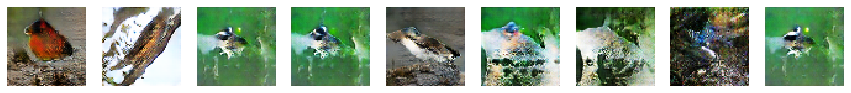

[ 7121  2583  3711  1936  2791 10901  5199  1831   574]
0 Black_And_White_Warbler_0125_160482.jpg
1 Yellow_Warbler_0097_176538.jpg
2 Least_Auklet_0052_795088.jpg
3 Bronzed_Cowbird_0061_796232.jpg
4 Cardinal_0081_17291.jpg
5 Black_Tern_0024_144039.jpg
6 White_Breasted_Nuthatch_0039_86166.jpg
7 American_Crow_0113_25149.jpg
8 Brown_Thrasher_0095_155082.jpg
(9, 64, 64, 3)


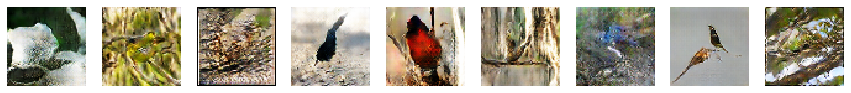

[ 4813  3312 10730  5985   345  7586  7007 11050 11089]
0 Seaside_Sparrow_0070_796540.jpg
1 Field_Sparrow_0090_113613.jpg
2 Winter_Wren_0015_190099.jpg
3 Cliff_Swallow_0028_132365.jpg
4 Pacific_Loon_0024_75555.jpg
5 Loggerhead_Shrike_0039_106367.jpg
6 American_Redstart_0108_103686.jpg
7 Great_Grey_Shrike_0085_797037.jpg
8 Great_Grey_Shrike_0061_106580.jpg
(9, 64, 64, 3)


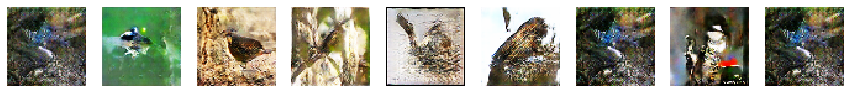

[ 5566  4485  8421  1423  9731  7199   869  6434 10856]
0 American_Three_Toed_Woodpecker_0013_179833.jpg
1 Summer_Tanager_0037_140330.jpg
2 Palm_Warbler_0012_170857.jpg
3 Nelson_Sharp_Tailed_Sparrow_0025_796945.jpg
4 Northern_Flicker_0046_28391.jpg
5 Green_Tailed_Towhee_0077_797443.jpg
6 Ovenbird_0015_93037.jpg
7 Pelagic_Cormorant_0093_23722.jpg
8 Black_Tern_0029_144140.jpg
(9, 64, 64, 3)


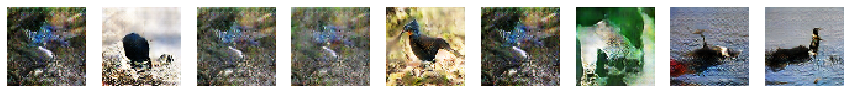

[11356  1171  7132  8945  1062  7684 10053  7012  4473]
0 Parakeet_Auklet_0035_795934.jpg
1 Pomarine_Jaeger_0056_795770.jpg
2 Chestnut_Sided_Warbler_0061_163978.jpg
3 Green_Violetear_0110_60866.jpg
4 Kentucky_Warbler_0065_795899.jpg
5 Cerulean_Warbler_0041_163535.jpg
6 Acadian_Flycatcher_0067_29197.jpg
7 Scott_Oriole_0051_795807.jpg
8 Summer_Tanager_0101_139441.jpg
(9, 64, 64, 3)


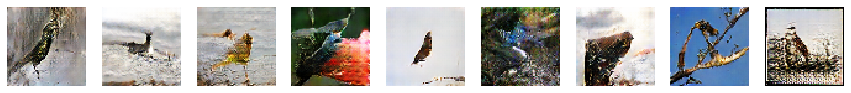

[ 4809 11102 11265  7597  1681  7039  6588  7743   897]
0 Eastern_Towhee_0098_22676.jpg
1 Brown_Creeper_0127_24656.jpg
2 Horned_Grebe_0102_34448.jpg
3 Loggerhead_Shrike_0019_106132.jpg
4 Hooded_Merganser_0056_79112.jpg
5 Scott_Oriole_0008_795814.jpg
6 Laysan_Albatross_0099_869.jpg
7 Clark_Nutcracker_0024_85718.jpg
8 Bobolink_0057_10051.jpg
(9, 64, 64, 3)


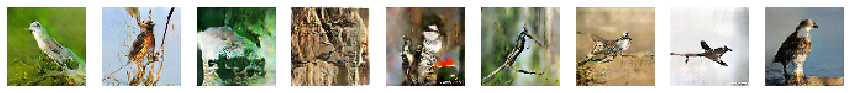

[   64  8809  6527  9566  9550  1877  9351 10795  4055]
0 Lazuli_Bunting_0040_14923.jpg
1 Least_Tern_0107_154015.jpg
2 Western_Grebe_0033_36395.jpg
3 Black_Throated_Blue_Warbler_0096_161654.jpg
4 Black_Throated_Blue_Warbler_0104_161686.jpg
5 Purple_Finch_0117_27427.jpg
6 Red_Breasted_Merganser_0033_79353.jpg
7 Horned_Lark_0035_74555.jpg
8 Pine_Grosbeak_0091_38811.jpg
(9, 64, 64, 3)


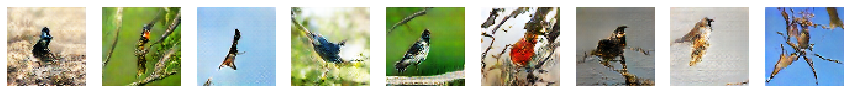

[ 9160  9552  9684  1372  5080 10264  4758 10000  9726]
0 Prairie_Warbler_0054_172602.jpg
1 Black_Throated_Blue_Warbler_0083_161462.jpg
2 Northern_Flicker_0006_28290.jpg
3 Gray_Crowned_Rosy_Finch_0022_27028.jpg
4 Blue_Headed_Vireo_0098_156348.jpg
5 Mourning_Warbler_0023_795362.jpg
6 Eastern_Towhee_0126_22639.jpg
7 Black_Capped_Vireo_0037_797495.jpg
8 Northern_Flicker_0093_28700.jpg
(9, 64, 64, 3)


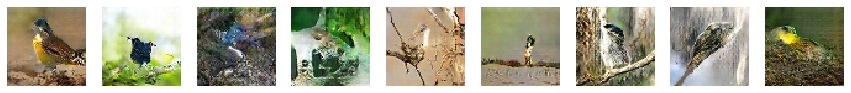

[ 8573  8617  9441  1168  2067  5966 10197  3430  4491]
0 Gray_Kingbird_0022_70155.jpg
1 Gray_Kingbird_0049_795022.jpg
2 Yellow_Billed_Cuckoo_0097_26713.jpg
3 Pomarine_Jaeger_0049_795795.jpg
4 Pileated_Woodpecker_0028_180258.jpg
5 Cliff_Swallow_0038_133701.jpg
6 Lincoln_Sparrow_0036_117280.jpg
7 Harris_Sparrow_0072_116662.jpg
8 Summer_Tanager_0013_140828.jpg
(9, 64, 64, 3)


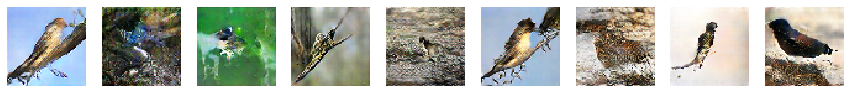

[ 7707  4739  6707 10454  2644  8626  8796  3318  4546]
0 Cerulean_Warbler_0002_797219.jpg
1 Western_Meadowlark_0079_78856.jpg
2 Philadelphia_Vireo_0078_794776.jpg
3 Tree_Swallow_0108_135068.jpg
4 Carolina_Wren_0112_186562.jpg
5 Painted_Bunting_0087_15232.jpg
6 Fox_Sparrow_0055_114809.jpg
7 Field_Sparrow_0021_113461.jpg
8 Tree_Sparrow_0022_123496.jpg
(9, 64, 64, 3)


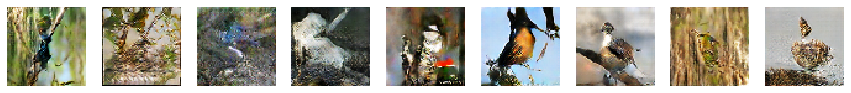

[ 7823  3452 10742  9016    53  3651  5625  2688 11089]
0 Rose_Breasted_Grosbeak_0033_39290.jpg
1 Harris_Sparrow_0010_116376.jpg
2 Sooty_Albatross_0058_796360.jpg
3 Chuck_Will_Widow_0054_22782.jpg
4 Lazuli_Bunting_0092_14656.jpg
5 Great_Crested_Flycatcher_0061_29807.jpg
6 White_Throated_Sparrow_0121_129201.jpg
7 Red_Winged_Blackbird_0011_5845.jpg
8 Great_Grey_Shrike_0061_106580.jpg
(9, 64, 64, 3)


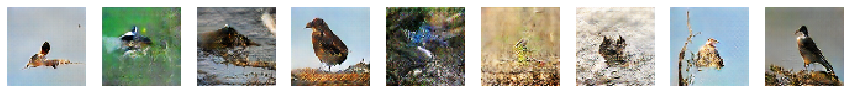

[ 1254  9273 11738  1620  7204  9768   483  8132  5773]
0 Bohemian_Waxwing_0048_177821.jpg
1 Vermilion_Flycatcher_0018_42474.jpg
2 Gadwall_0058_31660.jpg
3 Red_Legged_Kittiwake_0019_795398.jpg
4 Green_Tailed_Towhee_0024_154855.jpg
5 Rhinoceros_Auklet_0010_797545.jpg
6 Dark_Eyed_Junco_0104_67820.jpg
7 Evening_Grosbeak_0085_37487.jpg
8 White_Breasted_Kingfisher_0089_73371.jpg
(9, 64, 64, 3)


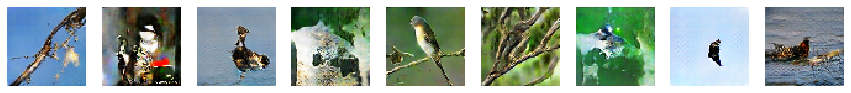

[ 1849 10635   566   978 10698  3447  8403  4790 10021]
0 Purple_Finch_0113_27547.jpg
1 Le_Conte_Sparrow_0087_795198.jpg
2 Brown_Thrasher_0096_155412.jpg
3 American_Pipit_0008_100390.jpg
4 Winter_Wren_0050_189514.jpg
5 Harris_Sparrow_0001_116398.jpg
6 Palm_Warbler_0126_170311.jpg
7 Eastern_Towhee_0110_22549.jpg
8 Acadian_Flycatcher_0040_795629.jpg
(9, 64, 64, 3)


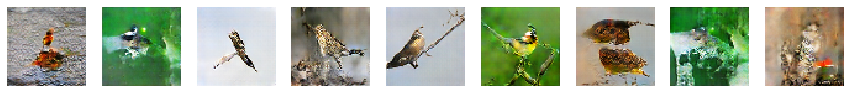

[ 5611  4724  4356  5323   955  6094  5780  8908 11688]
0 White_Throated_Sparrow_0007_128918.jpg
1 Western_Meadowlark_0017_78940.jpg
2 Boat_Tailed_Grackle_0099_33455.jpg
3 House_Sparrow_0128_110971.jpg
4 American_Pipit_0089_100260.jpg
5 Yellow_Throated_Vireo_0043_159628.jpg
6 White_Breasted_Kingfisher_0053_73476.jpg
7 Florida_Jay_0105_64522.jpg
8 Pine_Warbler_0037_171649.jpg
(9, 64, 64, 3)


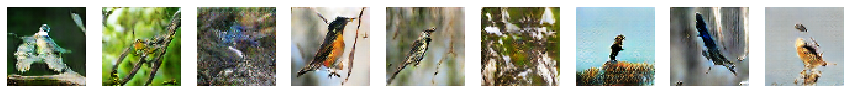

[11799  5016  4144   934  7978   663  2025  5578  7100]
0 Blue_Grosbeak_0048_36809.jpg
1 European_Goldfinch_0047_33332.jpg
2 Mockingbird_0006_79819.jpg
3 Bobolink_0032_10217.jpg
4 Herring_Gull_0115_47123.jpg
5 Scissor_Tailed_Flycatcher_0103_41938.jpg
6 Pileated_Woodpecker_0012_179976.jpg
7 American_Three_Toed_Woodpecker_0036_796146.jpg
8 Black_And_White_Warbler_0047_160547.jpg
(9, 64, 64, 3)


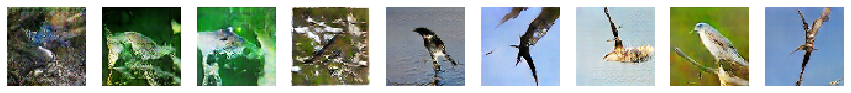

[ 5187  1349  8301  1170  4189  4616 11446  5285  8467]
0 White_Breasted_Nuthatch_0075_86289.jpg
1 Common_Tern_0098_148785.jpg
2 Barn_Swallow_0093_130121.jpg
3 Pomarine_Jaeger_0031_61420.jpg
4 House_Wren_0091_188046.jpg
5 Eared_Grebe_0068_34052.jpg
6 Yellow_Breasted_Chat_0001_21928.jpg
7 Golden_Winged_Warbler_0024_794807.jpg
8 Henslow_Sparrow_0006_796607.jpg
(9, 64, 64, 3)


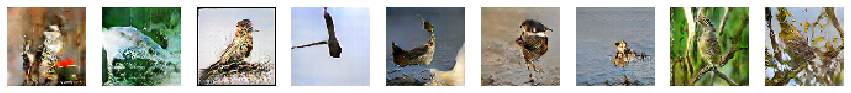

[ 1101  2434  8513 10991  9687  5013  4451  9485  8783]
0 Kentucky_Warbler_0010_795912.jpg
1 Western_Wood_Pewee_0059_98262.jpg
2 Gray_Catbird_0126_19446.jpg
3 Ruby_Throated_Hummingbird_0010_58285.jpg
4 Northern_Flicker_0068_28330.jpg
5 European_Goldfinch_0108_33176.jpg
6 Summer_Tanager_0030_139210.jpg
7 Black_Footed_Albatross_0061_796082.jpg
8 Fox_Sparrow_0016_114213.jpg
(9, 64, 64, 3)


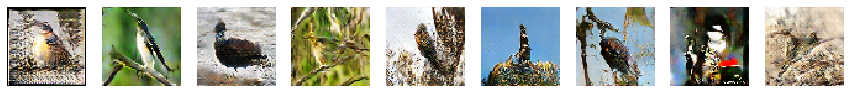

[7125 6574 2014 1332 8447 2760 2507 3373 5903]
0 Black_And_White_Warbler_0072_160353.jpg
1 Laysan_Albatross_0059_488.jpg
2 Black_Throated_Sparrow_0056_107010.jpg
3 Common_Tern_0075_148528.jpg
4 Henslow_Sparrow_0060_796619.jpg
5 Cardinal_0010_18894.jpg
6 Red_Bellied_Woodpecker_0123_182116.jpg
7 Geococcyx_0010_104197.jpg
8 Rusty_Blackbird_0112_3415.jpg
(9, 64, 64, 3)


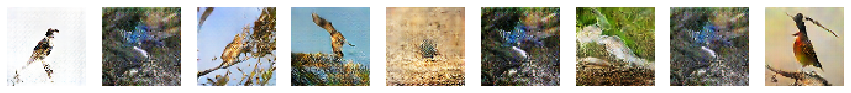

[10518  6586  2234  5501 11052  8096  7303   835   613]
0 White_Crowned_Sparrow_0047_127575.jpg
1 Laysan_Albatross_0068_726.jpg
2 Red_Eyed_Vireo_0003_157226.jpg
3 Scarlet_Tanager_0038_138198.jpg
4 Great_Grey_Shrike_0055_106858.jpg
5 Evening_Grosbeak_0050_37336.jpg
6 Pigeon_Guillemot_0009_40218.jpg
7 Ovenbird_0126_92602.jpg
8 Savannah_Sparrow_0015_118910.jpg
(9, 64, 64, 3)


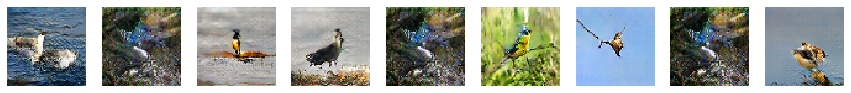

[ 5770 11506 11726  4744  3985  7388  8586   323  8487]
0 White_Breasted_Kingfisher_0109_73683.jpg
1 Baird_Sparrow_0034_794589.jpg
2 Gadwall_0050_31223.jpg
3 Western_Meadowlark_0018_77880.jpg
4 Common_Raven_0093_102058.jpg
5 Glaucous_Winged_Gull_0073_44253.jpg
6 Gray_Kingbird_0059_795030.jpg
7 Common_Yellowthroat_0058_190958.jpg
8 Henslow_Sparrow_0031_796594.jpg
(9, 64, 64, 3)


KeyboardInterrupt: ignored

In [69]:
#
from keras.preprocessing.image import array_to_img

from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy import asarray
import numpy as np

import os
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from numpy.random import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from numpy.random import randn
from numpy.random import randint
import time
import matplotlib.pyplot as pyplot
from keras.preprocessing.image import array_to_img
from numpy import linspace
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from numpy.random import randint
import numpy as np

def create_sent_vector(sent):
  result_array = np.empty((0, 300))

  for word in word_tokenize(sent):
    result_array = np.append(result_array, [model[word]], axis=0)
  final = np.mean(result_array, axis=0).astype('float32')
  return final

def generate_random_word_vectors_from_dataset(n_samples, create_new_captions = False):

  if create_new_captions:
      e = create_sent_vector('This bird has  white breast with brown feathers')
      f = create_sent_vector('This bird has  white breast with blue feathers')
      v = []
      flag = False
      for i in range(9):
        
        if not flag:
          v.append(f)
          flag = True
        elif flag:
          v.append(e)
          flag = False
      return np.asarray(v), np.asarray([])
  else:
    ix = randint(0,len(captions), n_samples)
    print(ix)
    return  np.asarray(captions)[ix], np.asarray(labels)[ix]

def generate_images(model, test_input):

  predictions = model(test_input, training=False)

  print(predictions.shape)
  pyplot.figure(figsize=[15, 15])
  for i in range(predictions.shape[0]):
      pyplot.subplot(1, 9, i+1)
      pyplot.imshow(array_to_img(predictions.numpy()[i]))
      pyplot.axis('off')

  pyplot.show()

# Credit to: https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/
def interpolate_points(p1, p2, n_steps=9):
	ratios = linspace(0, 1, num=n_steps)
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)
 
def generate_latent_points(latent_dim, n_samples, interpolate = False):
    x_input  = tf.random.normal([n_samples, latent_dim])
    text_captions, labels = generate_random_word_vectors_from_dataset(n_samples, create_new_captions=False)
    if interpolate:
      text_captions = interpolate_points(text_captions[0], text_captions[1])
      x_input = interpolate_points(x_input[0], x_input[1])
    for index, s in enumerate(labels.flat):
      print(index, s)

    return [x_input, text_captions]

gen_model = tf.keras.models.load_model('/content/drive/My Drive/146stage_new_gan_animal_model_120.h5')

for i in range(40):
  generate_images(gen_model, generate_latent_points(100, 9))


In [26]:
def get_index_by_label(label):
  for idx, l in enumerate(labels):
    if l in label:
      return idx


print(get_index_by_label('Western_Wood_Pewee_0061_795060.jpg'))

2398
Prothonotary_Warbler_0127_174149.jpg


(-0.5, 63.5, 63.5, -0.5)

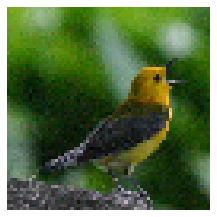

In [28]:
# Show image in image embeddings

pyplot.figure(figsize=[8, 8])

pyplot.subplot(1, 2, 0+1)
pyplot.imshow(array_to_img(image_embeddings[5432]))
pyplot.axis('off')